In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/caioz/Tech_Challenge_fase-4/refs/heads/main/Obesity.csv')

In [4]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

# Arredondar as colunas de escala

In [6]:
cols_round = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in cols_round:
    df[col] = df[col].round().astype(int)

### Converter para category



In [7]:
cols_cat = [
    'Gender', 'family_history', 'FAVC', 'CAEC',
    'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity'
]

for col in cols_cat:
    df[col] = df[col].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          2111 non-null   category
 1   Age             2111 non-null   float64 
 2   Height          2111 non-null   float64 
 3   Weight          2111 non-null   float64 
 4   family_history  2111 non-null   category
 5   FAVC            2111 non-null   category
 6   FCVC            2111 non-null   int32   
 7   NCP             2111 non-null   int32   
 8   CAEC            2111 non-null   category
 9   SMOKE           2111 non-null   category
 10  CH2O            2111 non-null   int32   
 11  SCC             2111 non-null   category
 12  FAF             2111 non-null   int32   
 13  TUE             2111 non-null   int32   
 14  CALC            2111 non-null   category
 15  MTRANS          2111 non-null   category
 16  Obesity         2111 non-null   category
dtypes: category(9)

### Análise Exploratória (EDA Estratégica)

In [9]:
df['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

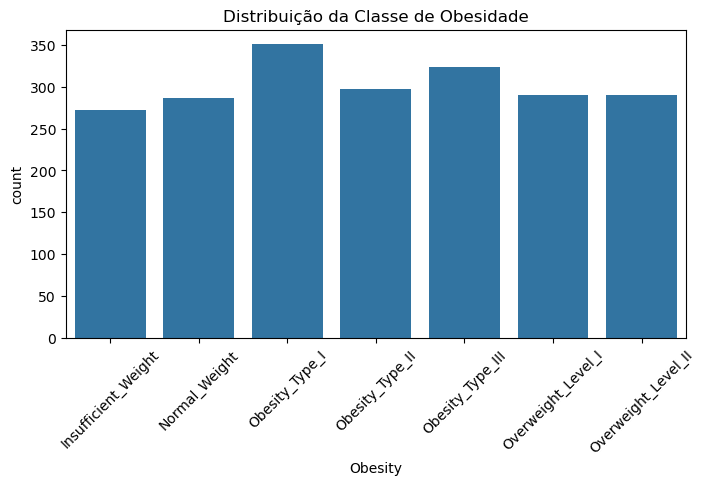

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Obesity')
plt.xticks(rotation=45)
plt.title('Distribuição da Classe de Obesidade')
plt.show()

### Separar X e y

In [11]:
X = df.drop('Obesity', axis=1)
y = df['Obesity']

# Dividir treino e teste

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Criar pipeline

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [15]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

0.9267139479905437

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.94      0.95        54
      Normal_Weight       0.76      0.86      0.81        58
     Obesity_Type_I       0.93      0.97      0.95        70
    Obesity_Type_II       1.00      0.95      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.84      0.87        58
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.93       423
          macro avg       0.93      0.92      0.93       423
       weighted avg       0.93      0.93      0.93       423



# Matriz de Confusão

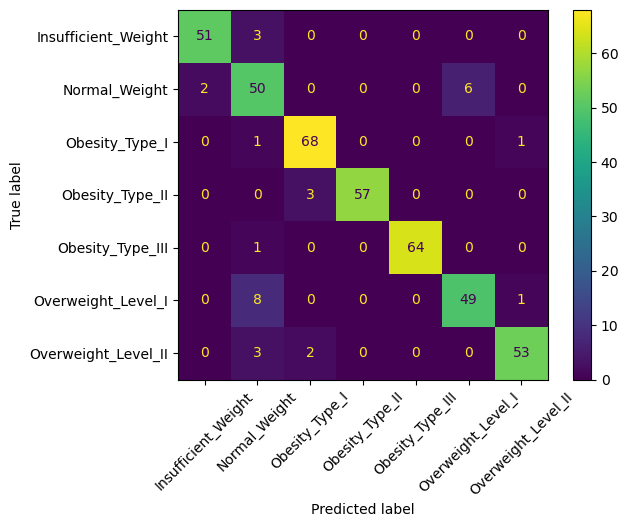

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45)
plt.show()

# Criar varíaveis - IMC

> Adicionar aspas



In [18]:
df['IMC'] = df['Weight'] / (df['Height'] ** 2)

In [19]:
df.groupby('Obesity')['IMC'].mean().sort_values()

C:\Users\caioz\AppData\Local\Temp\ipykernel_17500\715308394.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Obesity')['IMC'].mean().sort_values()


Obesity
Insufficient_Weight    17.404245
Normal_Weight          22.014147
Overweight_Level_I     25.990772
Overweight_Level_II    28.215232
Obesity_Type_I         32.255636
Obesity_Type_II        36.723424
Obesity_Type_III       42.273746
Name: IMC, dtype: float64

# Criar varíaveis - Atividade Física (FAF) x Obesidade




In [20]:
pd.crosstab(df['FAF'], df['Obesity'])

Obesity,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAF,,,,,,,
0,72,80,131,69,187,84,97
1,72,97,123,165,68,126,125
2,117,69,72,63,69,56,50
3,11,41,25,0,0,24,18


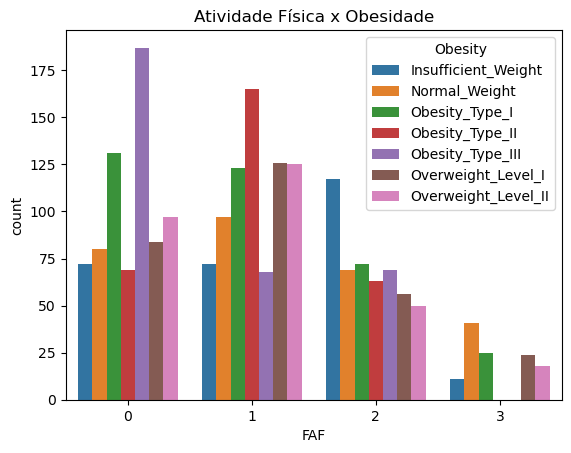

In [21]:
sns.countplot(data=df, x='FAF', hue='Obesity')
plt.title('Atividade Física x Obesidade')
plt.show()

# Consumo de alimentos calóricos (FAVC)


In [22]:
pd.crosstab(df['FAVC'], df['Obesity'])

Obesity,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,51,79,11,7,1,22,74
yes,221,208,340,290,323,268,216


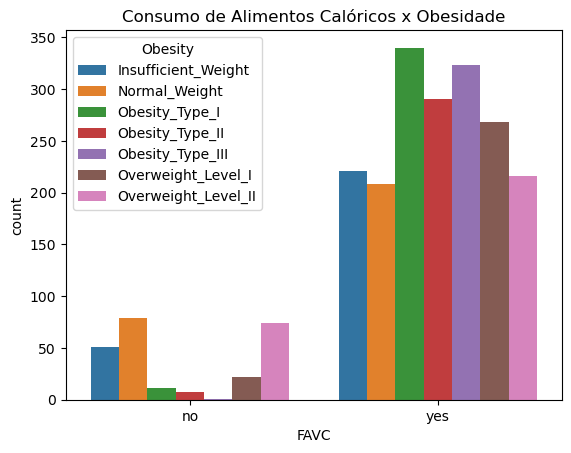

In [23]:
sns.countplot(data=df, x='FAVC', hue='Obesity')
plt.title('Consumo de Alimentos Calóricos x Obesidade')
plt.show()

# Criar varíaveis - Consumo de água (CH2O)


In [24]:
pd.crosstab(df['CH2O'], df['Obesity'])

Obesity,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CH2O,,,,,,,
1,84,83,68,82,61,60,47
2,142,164,173,177,114,154,186
3,46,40,110,38,149,76,57


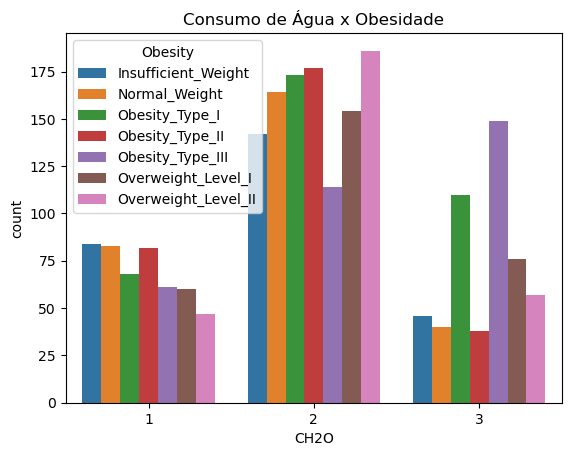

In [25]:
sns.countplot(data=df, x='CH2O', hue='Obesity')
plt.title('Consumo de Água x Obesidade')
plt.show()

#### Agora iremos separar nossa variável target com as categorica.

In [26]:
X = df.drop(columns="Obesity")
y = df["Obesity"]

#### Agora iremos separar nossas colunas numéricas com as strings.

In [27]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

Agora iremos separar nossa base de treino e de teste.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Agora iremos criar nossa pepiline, porém dentro dela já iremos normalizar nossos dados para os modelos.

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

# Logistic Regression

Instânciando nosso modelo dentro da pipeline.

In [30]:
pipe_logistic_regression = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=1000, multi_class="multinomial"))
])


Treinando nosso modelo.

In [31]:
pipe_logistic_regression.fit(X_train, y_train)

e:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'IMC'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [32]:
# Acurácia
predict_logistic_regression= pipe_logistic_regression.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predict_logistic_regression))
print(classification_report(y_test, predict_logistic_regression))

Accuracy: 0.9219858156028369
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        54
      Normal_Weight       0.98      0.78      0.87        58
     Obesity_Type_I       0.93      1.00      0.97        70
    Obesity_Type_II       0.93      0.93      0.93        60
   Obesity_Type_III       0.98      0.94      0.96        65
 Overweight_Level_I       0.81      0.93      0.86        58
Overweight_Level_II       0.94      0.86      0.90        58

           accuracy                           0.92       423
          macro avg       0.93      0.92      0.92       423
       weighted avg       0.93      0.92      0.92       423



e:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


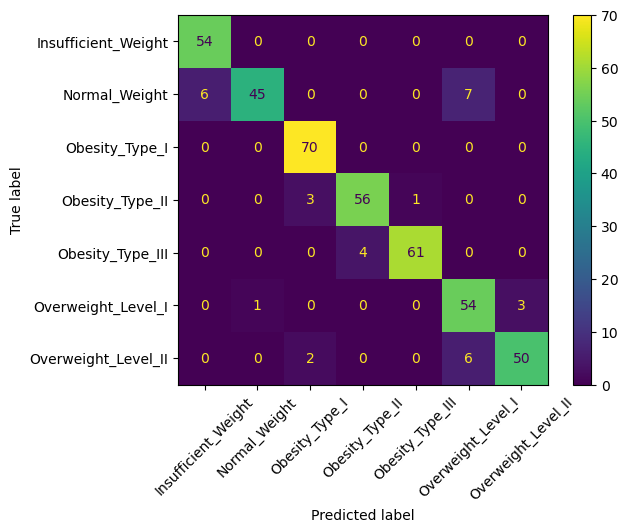

In [33]:
# Matriz de confusão
modelo = pipe_logistic_regression
modelo.fit(X_train, y_train)

previsoes = modelo.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, previsoes, xticks_rotation=45)

In [34]:
import sklearn
print(sklearn.__version__)

1.5.1
